# Culture data table clean up

In [33]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from zipfile import ZipFile
import os
import seaborn as sns

pd.options.mode.chained_assignment = None

In [34]:
# unzipping survey tables

# specifying location of .zip and extraction location
sur_B_path="/home/rthoms/ocean_dep/sur_B/raw_data/Sur_B_03072023.zip"
sur_B_raw="/home/rthoms/ocean_dep/sur_B/raw_data/sur_B_raw"

# loading the .zip and creating a zip object
with ZipFile(sur_B_path, 'r') as zObject:

	# Extracting all the members of the zip
	# into a the specified location.
	zObject.extractall(
		path=sur_B_raw)

In [35]:
# specifiy location of raw data
# main survey table
df_main = pd.read_csv("/home/rthoms/ocean_dep/sur_B/clean_up/survey_main_table_clean.csv")

# tradiion resource table
trad_raw = os.path.join(sur_B_raw, "tradition_resource_table_5.csv")
df_trad = pd.read_csv(trad_raw, dtype={'trad_resource': object})

# social resource table
soc_raw = os.path.join(sur_B_raw, "social_resources_table_6.csv")
df_soc = pd.read_csv(soc_raw, dtype={'social_resource': object})

# identity resource table
iden_raw = os.path.join(sur_B_raw, "personal_identity_table_7.csv")
df_iden = pd.read_csv(iden_raw, dtype={'identity_resource': object})
df_trad


,ObjectID,GlobalID,trad_resource,_tradition_resource_label,tradition_raw,tradition,ParentGlobalID,CreationDate,Creator,EditDate,Editor
0,3,d360d3b3-81dc-4b1e-8fa1-ed3bafebc8b0,01,mihili (1),10,0.333333,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,rthoms_wri,4/11/2023 6:30:30 AM,rthoms_wri
1,4,2cb67db0-e2c8-40c4-a263-ec83f3388e12,03,salani (3),20,0.666667,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,4/11/2023 6:30:30 AM,rthoms_wri,4/11/2023 6:30:30 AM,rthoms_wri
2,7,140e2224-98b0-4ea1-b1c1-6691f41fd7c0,03,salani (3),30,1.000000,3f3b6da1-f4ee-467b-9647-aefe9851351f,4/11/2023 1:37:44 PM,rthoms_wri,4/11/2023 1:37:44 PM,rthoms_wri
3,10,5113daa6-76e9-4053-be73-61fd0c8d78a7,01,mihili (1),15,0.500000,8b4320ee-bf8d-4616-b0bc-d8bc33e9cc99,4/11/2023 2:46:23 PM,rthoms_wri,4/11/2023 2:46:23 PM,rthoms_wri
4,11,7ba3d528-1f4a-496b-8219-aefbe9ca0bb9,03,salani (3),15,0.500000,8b4320ee-bf8d-4616-b0bc-d8bc33e9cc99,4/11/2023 2:46:23 PM,rthoms_wri,4/11/2023 2:46:23 PM,rthoms_wri
...,...,...,...,...,...,...,...,...,...,...,...
202,210,8b2ae61b-1b9b-4788-979b-1ca1c2bff5fe,52,gihologo (52),6,0.200000,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,rthoms_wri,7/1/2023 12:17:35 PM,rthoms_wri
203,211,a564c840-e5f5-471a-a36f-1684386492a0,53,masaba (53),5,0.166667,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,rthoms_wri,7/1/2023 12:17:35 PM,rthoms_wri
204,212,8c276864-1eb3-495b-a1a0-74517ec27b4a,55,"gudua, girumba (55)",6,0.200000,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,rthoms_wri,7/1/2023 12:17:35 PM,rthoms_wri
205,213,bdef0b2f-b00f-4183-a3ad-a43378d8c36f,56,mavandzi (56),5,0.166667,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,7/1/2023 12:17:35 PM,rthoms_wri,7/1/2023 12:17:35 PM,rthoms_wri


In [36]:
df_main = df_main.drop_duplicates(
  subset = ['ParentGlobalID', 'pract_cat'],
  keep = 'first').reset_index(drop = True)
df_main

,Unnamed: 0,ParentGlobalID,id,ccp,gender,fish_pract,owner,catch_proportion,pract_cat
0,0,5242b473-cb0e-43ec-bc8f-6e626f4ee1d3,13022023NHAMUB02,nhamua,f,glean,NaN,1.00,glean
1,1,3f3b6da1-f4ee-467b-9647-aefe9851351f,16022023NHMUB05,nhamua,f,glean,NaN,1.00,glean
2,2,8b4320ee-bf8d-4616-b0bc-d8bc33e9cc99,16022023NHMUB07,nhamua,m,gill_net,owner,0.33,fish
3,3,1205bf41-13d7-4421-b564-4a77c527cd17,13022023NHMUB01,nhamua,m,fence_trap,owner,1.00,fish
4,4,310a5eff-b95e-4979-a0dd-c98a7703f436,13022023NHMUB03,nhamua,m,gill_net,NR,0.25,fish
...,...,...,...,...,...,...,...,...,...
118,122,074701a4-86f2-4beb-a67e-b12fc841f7fe,07022023CUGB04,kuguana,f,drag_net,NR,0.33,fish
119,123,368b8b4c-a618-434a-8ebe-7f7fa8c143fc,07022023CUGB05,kuguana,m,drag_net,supervisor,0.24,fish
120,124,454f8afd-86aa-4418-80e3-4e1ccb572b8c,07022023CUGB06,kuguana,m,fence_trap,owner,1.00,fish
121,125,1dfbdb30-77d7-4a1e-aaf1-2a5bccccfb75,07022023CUGB07,kuguana,m,fence_trap,owner,1.00,fish


In [37]:
# species table
species = pd.read_csv("/home/rthoms/ocean_dep/sur_B/clean_up/species.csv")

In [38]:
# seagrass dependence from survey C
sg_dep = pd.read_csv("/home/rthoms/ocean_dep/sur_A/sg_dep.csv", dtype={'focal_resource': object})
sg_dep.rename(columns={'focal_resource':'resource_id'}, inplace=True)
sg_dep

,Unnamed: 0,resource_id,sg_dep_median,sg_dep_cat
0,0,01,0.0,none
1,1,02,0.0,none
2,2,03,0.5,none
3,3,04,3.0,high
4,4,06,2.5,mod
5,5,07,3.0,high
6,6,10,0.0,none
7,7,11,0.0,none
8,8,37,0.0,none
9,9,50,3.0,high


In [39]:
df_trad.rename(columns={'trad_resource':'resource_id'}, inplace=True)
df_trad_wk = pd.merge(df_trad,species,on='resource_id', how='left')
df_trad_wk = df_trad_wk[df_trad_wk['focal']== 1]
df_trad_wk = pd.merge(df_trad_wk, df_main, on='ParentGlobalID', how='left')
df_trad_wk = pd.merge(df_trad_wk,sg_dep,on='resource_id', how='left')
df_trad_wk.sort_values(by='tradition', ascending=False, inplace=True)
df_trad_wk.columns

Index(['ObjectID', 'GlobalID', 'resource_id', '_tradition_resource_label',
       'tradition_raw', 'tradition', 'ParentGlobalID', 'CreationDate',
       'Creator', 'EditDate', 'Editor', 'gitonga_s', 'gitonga_p', 'portuguese',
       'scientific', 'family', 'phylum', 'category', 'focal', 'communities',
       'Unnamed: 0_x', 'id', 'ccp', 'gender', 'fish_pract', 'owner',
       'catch_proportion', 'pract_cat', 'Unnamed: 0_y', 'sg_dep_median',
       'sg_dep_cat'],
      dtype='object')

In [40]:
df_soc.rename(columns={'social_resource':'resource_id'}, inplace=True)
df_soc_wk = pd.merge(df_soc,species,on='resource_id', how='left')
df_soc_wk = df_soc_wk[df_soc_wk['focal']== 1]
df_soc_wk = pd.merge(df_main,df_soc_wk,on='ParentGlobalID', how='right')
df_soc_wk = pd.merge(df_soc_wk,sg_dep,on='resource_id', how='left')
df_soc_wk.sort_values(by='resource_id', ascending=True, inplace=True)
df_soc_wk


,Unnamed: 0_x,ParentGlobalID,id,ccp,gender,fish_pract,owner,catch_proportion,pract_cat,ObjectID,...,portuguese,scientific,family,phylum,category,focal,communities,Unnamed: 0_y,sg_dep_median,sg_dep_cat
90,37,fa135abb-d0cf-4f86-81fa-d786fd8a957a,02022023MARB04,marrambone,f,gill_net,owner,1.00,fish,88,...,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",0.0,0.0,none
254,99,943aa64d-7c5c-4594-944e-529e0b325617,01022023MOR04,morrumbene,f,glean,NaN,1.00,glean,240,...,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",0.0,0.0,none
73,30,fb35740b-c147-41b7-b604-35eed1bf5c77,04022023CHAB08,chamane,m,shrimp_net,owner,0.50,shrimp_net,78,...,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",0.0,0.0,none
127,45,b1aecc22-d28c-4728-9c70-966d76a26e88,31012023MUB02,mucucune,m,fence_trap,owner,1.00,fish,117,...,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",0.0,0.0,none
72,29,fb35740b-c147-41b7-b604-35eed1bf5c77,04022023CHAB08,chamane,m,gill_net,owner,0.66,fish,78,...,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",0.0,0.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,46,84267d00-7c2a-415c-b15e-d1f3a08a24ea,31012023MUCB03,mucucune,f,glean,NaN,1.00,glean,124,...,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,"mucucune,nhampossa,madava,kuguana",25.0,0.0,none
197,64,6aff3bd5-1d7f-4dfc-a530-7fd33a3b1432,08022023MADB05,madava,m,gill_net,owner,1.00,fish,188,...,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,"mucucune,nhampossa,madava,kuguana",25.0,0.0,none
318,126,d63dc568-99da-438e-bd41-3a79bf13b0d9,07022023CUGBO8,kuguana,f,glean,NaN,1.00,glean,293,...,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,"mucucune,nhampossa,madava,kuguana",25.0,0.0,none
150,49,72b20ec3-78b0-44b1-8f62-06504a26e4c5,31012023MUCB06,mucucune,m,gill_net,owner,0.50,fish,140,...,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,"mucucune,nhampossa,madava,kuguana",25.0,0.0,none


In [41]:

df_iden.rename(columns={'identity_resource':'resource_id'}, inplace=True)
df_iden_wk = pd.merge(df_iden,species,on='resource_id', how='left')
df_iden_wk = df_iden_wk[df_iden_wk['focal']== 1]
df_iden_wk = pd.merge(df_main,df_iden_wk,on='ParentGlobalID', how='right')
df_iden_wk = pd.merge(df_iden_wk,sg_dep,on='resource_id', how='left')
df_iden_wk.sort_values(by='resource_id', ascending=True, inplace=True)
df_iden_wk

,Unnamed: 0_x,ParentGlobalID,id,ccp,gender,fish_pract,owner,catch_proportion,pract_cat,ObjectID,...,portuguese,scientific,family,phylum,category,focal,communities,Unnamed: 0_y,sg_dep_median,sg_dep_cat
91,36,fa135abb-d0cf-4f86-81fa-d786fd8a957a,02022023MARB04,marrambone,f,shrimp_net,owner,1.0,shrimp_net,84,...,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",0.0,0.0,none
238,79,f1ab0d58-a047-4854-9fab-5639a38d0919,14022023SAHB02,sahane,m,hand_line,NaN,1.0,fish,219,...,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",0.0,0.0,none
133,45,b1aecc22-d28c-4728-9c70-966d76a26e88,31012023MUB02,mucucune,m,fence_trap,owner,1.0,fish,117,...,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",0.0,0.0,none
108,38,e8d84b41-6838-4a4d-b98d-66385c122993,02022023MARB05,marrambone,m,fence_trap,owner,1.0,fish,90,...,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",0.0,0.0,none
231,74,ba1de70c-3350-4192-9540-077338da9ce6,17022023NHCHB05,nhamaxaxa,m,hand_line,NaN,1.0,fish,211,...,pescadinha,Sillago sihama,Sillaginidae,bony fish,fish,1.0,"ilha,nhamua,josina_machel,chamane,marrambone,m...",0.0,0.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,32,6e76bb44-7881-4dfe-aff2-019452e7f1ef,02022023MARB02,marrambone,f,glean,NaN,1.0,glean,78,...,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,"mucucune,nhampossa,madava,kuguana",25.0,0.0,none
164,51,615838ac-55f5-4537-ba76-fecefaddd226,31012023MUCB08,mucucune,f,shrimp_net,owner,1.0,shrimp_net,148,...,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,"mucucune,nhampossa,madava,kuguana",25.0,0.0,none
84,33,6e76bb44-7881-4dfe-aff2-019452e7f1ef,02022023MARB02,marrambone,f,shrimp_net,owner,1.0,shrimp_net,78,...,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,"mucucune,nhampossa,madava,kuguana",25.0,0.0,none
157,50,a744e3c9-d3d2-4588-b6cd-900a3f4f4286,31012023MUCB07,mucucune,f,shrimp_net,owner,1.0,shrimp_net,141,...,Caracóis,Volema pyrum,Melongenidae,mollusc,gastropod,1.0,"mucucune,nhampossa,madava,kuguana",25.0,0.0,none


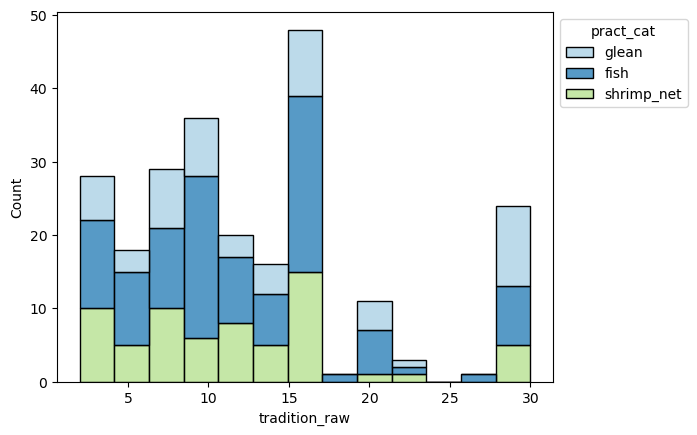

In [42]:
ax = sns.histplot(data=df_trad_wk, stat="count",multiple="stack", x="tradition_raw", kde=False, palette = "Paired", hue="pract_cat", element="bars",legend=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1)) 


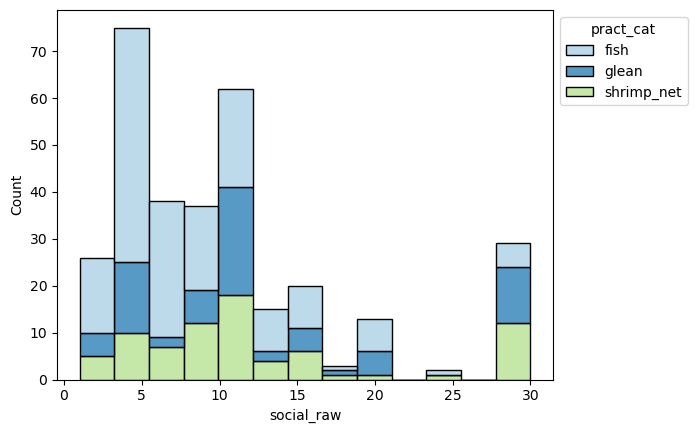

In [43]:
ax = sns.histplot(data=df_soc_wk, stat="count",multiple="stack", x="social_raw", kde=False, palette = "Paired", hue="pract_cat", element="bars",legend=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1)) 


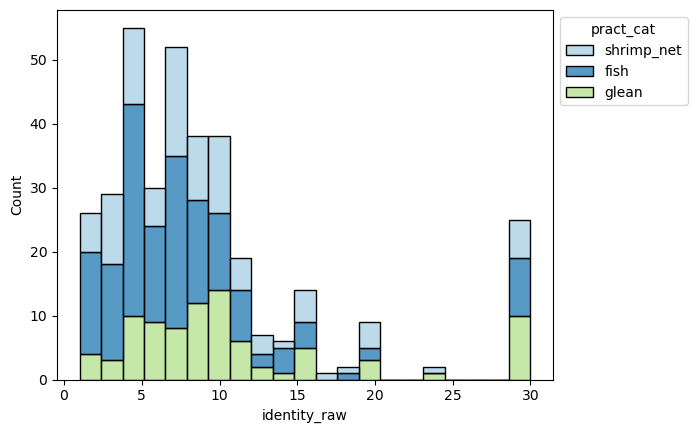

In [44]:
ax = sns.histplot(data=df_iden_wk, stat="count",multiple="stack", x="identity_raw", kde=False, palette = "Paired", hue="pract_cat", element="bars",legend=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1)) 


In [45]:
df_iden_wk.columns

Index(['Unnamed: 0_x', 'ParentGlobalID', 'id', 'ccp', 'gender', 'fish_pract',
       'owner', 'catch_proportion', 'pract_cat', 'ObjectID', 'GlobalID',
       'resource_id', '_identity_resource_label', 'identity_raw', 'identity',
       'CreationDate', 'Creator', 'EditDate', 'Editor', 'gitonga_s',
       'gitonga_p', 'portuguese', 'scientific', 'family', 'phylum', 'category',
       'focal', 'communities', 'Unnamed: 0_y', 'sg_dep_median', 'sg_dep_cat'],
      dtype='object')

In [46]:

df_trad_final = df_trad_wk[['resource_id',  'sg_dep_median', 'sg_dep_cat','tradition', 
                            'ParentGlobalID', 'gitonga_s', 'gitonga_p', 'portuguese',
                            'scientific', 'family', 'phylum', 'category', 'focal', 'id',
                            'ccp', 'gender', 'fish_pract','pract_cat']]
df_trad_final.to_csv("../trad_table_clean.csv")



In [47]:
df_iden_final = df_iden_wk[['resource_id',  'sg_dep_median', 'sg_dep_cat','identity', 
                            'ParentGlobalID', 'gitonga_s', 'gitonga_p', 'portuguese',
                            'scientific', 'family', 'phylum', 'category', 'focal', 'id',
                            'ccp', 'gender', 'fish_pract','pract_cat']]
df_iden_final.to_csv("../iden_table_clean.csv")

In [48]:
df_soc_final = df_soc_wk[['resource_id',  'sg_dep_median', 'sg_dep_cat','social', 
                            'ParentGlobalID', 'gitonga_s', 'gitonga_p', 'portuguese',
                            'scientific', 'family', 'phylum', 'category', 'focal', 'id',
                            'ccp', 'gender', 'fish_pract','pract_cat']]
df_soc_final.to_csv("../soc_table_clean.csv")